# Logistic Regression on the provided medical dataset. 
Using Sklearn and PCA for variable reduction. 

In [166]:
#-- Importing possible libraries --# 

import statistics
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline 
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from IPython.display import display



# Cleaing the data

In [167]:
#-- Importing the dataset --#
med_df_raw = pd.read_csv("/Users/lindasegalini/Desktop/WGU/New Program/D208 Predictive Modeling/medical_clean.csv")

#-- Dropping missing values --#
med_df_raw.dropna() 

#-- Dropping unessesary features --#

med_df_raw = med_df_raw.drop(columns = ['Gender','Complication_risk','Initial_admin','Additional_charges','TotalCharge','Initial_days','VitD_levels','Age','CaseOrder','Allergic_rhinitis','Reflux_esophagitis','Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng', 'Area','TimeZone','Job','Income','Services','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8',                       
                                        'Arthritis','Hyperlipidemia','BackPain'])

#-- Changing categorical to binary with get_dummies() and dropping the first column. 
med_df = pd.get_dummies(med_df_raw, drop_first =True)

#-- Dropping the previously combined columns to keep the number of columns down and create a tidier dataset --#
med_clean = med_df.drop(columns = ['Marital_Never Married','Marital_Separated','Marital_Widowed'])





Scaling the data.

In [168]:
#-- Filtering the data frame to remove the values exceeding 3 standard deviations --#
med_remove_df = med_clean[(np.abs(stats.zscore(med_df)) < 3).all(axis=1)]

#-- Displaying what rows were removed --#
med_clean.index.difference(med_remove_df.index)

Int64Index([  16,   79,  146,  153,  156,  160,  163,  180,  185,  219,
            ...
            9788, 9792, 9798, 9799, 9813, 9833, 9845, 9851, 9854, 9924],
           dtype='int64', length=413)

In [169]:
#-- Saving a copy of the cleaned dataset --#
med_clean.to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D208 Predictive Modeling/Processed_med_data.csv')

# Exploring the Dataset

In [170]:
med_clean.describe()

,Population,Children,Marital_Married,ReAdmis_Yes,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Diabetes_Yes,Anxiety_Yes,Asthma_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000
mean,9965.253800,2.097200,0.202300,0.366900,0.409000,0.199300,0.709400,0.27380,0.321500,0.28930
std,14824.758614,2.163659,0.401735,0.481983,0.491674,0.399494,0.454062,0.44593,0.467076,0.45346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,694.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,2769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.00000
75%,13945.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.00000
max,122814.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


Text(0.5, 1.0, 'Correlation Heatmap')

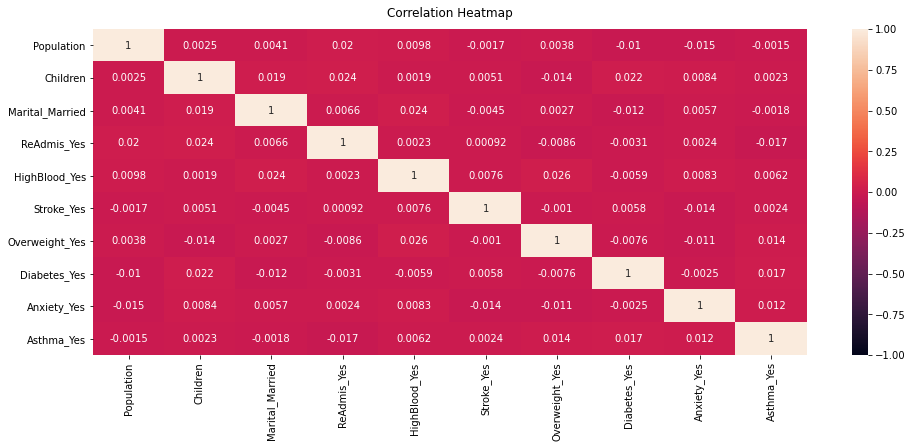

In [140]:
#-- No noticable multi-colinarity between the variables--#
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(med_clean.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)



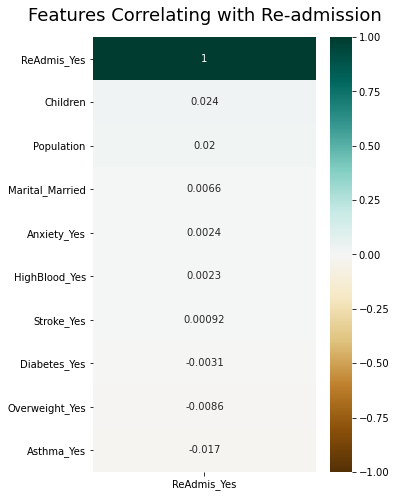

In [171]:
#--No noticable multi-colinarity between the Dependent variable and the Independent variables--#
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(med_clean.corr()[['ReAdmis_Yes']].sort_values(by='ReAdmis_Yes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Re-admission', fontdict={'fontsize':18}, pad=16);

Conducting Univariate and Bivariate analysis

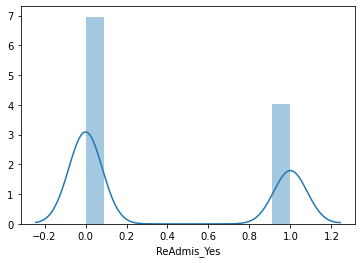

In [172]:
#--Distrobution of the target variable--#
tv = med_clean.ReAdmis_Yes

plot1 = sns.distplot(tv)

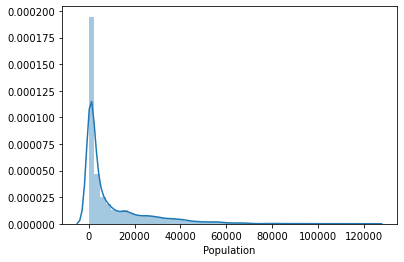

In [173]:
#-- Distrobution of the Popuation variable --#

pop = med_clean.Population
plot2 = sns.distplot(pop)

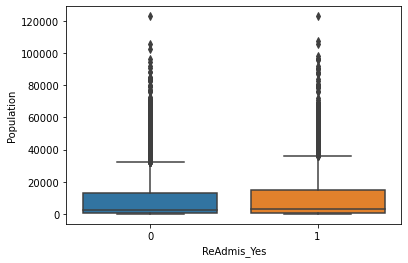

In [174]:
#-- Patient readmission variable paired to population --#
sns.boxplot(x="ReAdmis_Yes", y="Population", data= med_clean)

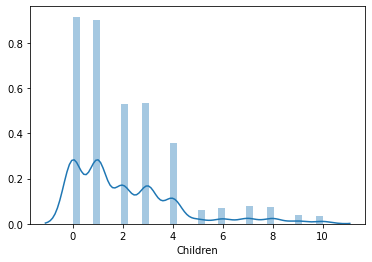

In [175]:
#-- Distrobution of children amoung patients --#

kids = med_clean.Children
plot3 = sns.distplot(kids)

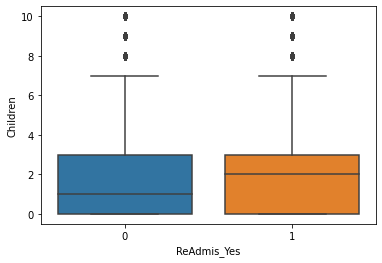

In [176]:
#-- Patient readmission variable paired to number of children per patient --#
sns.boxplot(x="ReAdmis_Yes", y="Children", data= med_clean)


/Users/lindasegalini/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


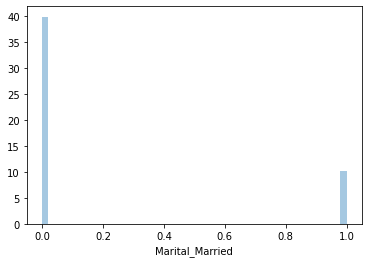

In [177]:
#-- Distrobution of married patients --#
mar = med_clean.Marital_Married
plot4 = sns.distplot(mar)

/Users/lindasegalini/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


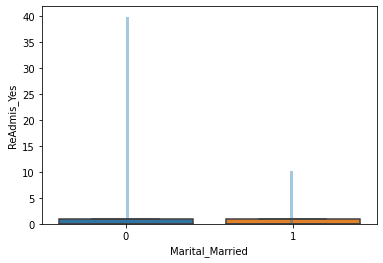

In [178]:
#-- Distrobution of married patients to whom readmit --#

mar = med_clean.Marital_Married
plot4 = sns.distplot(mar)

sns.boxplot(x="Marital_Married", y="ReAdmis_Yes", data= med_clean)

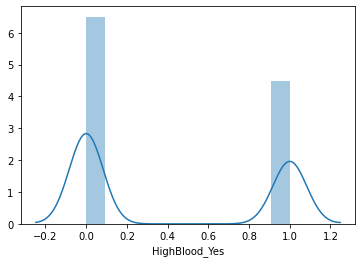

In [179]:
#-- Distrobution of readmitting patients with highblood pressure--#
Hiblood = med_clean.HighBlood_Yes
plot5 = sns.distplot(Hiblood)

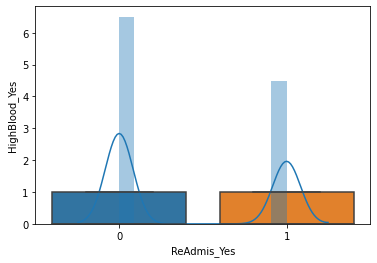

In [180]:
#-- Target variable comparied to patients with high blood pressure --#
Hiblood = med_clean.HighBlood_Yes
plot5 = sns.distplot(Hiblood)

sns.boxplot(x="ReAdmis_Yes", y="HighBlood_Yes", data= med_clean)

/Users/lindasegalini/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


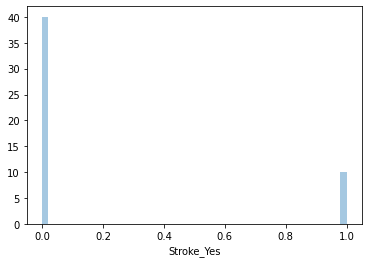

In [181]:
#-- Distrobution of patients whom suffered a stroke--#
stroke = med_clean.Stroke_Yes
plot6 = sns.distplot(stroke)

/Users/lindasegalini/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


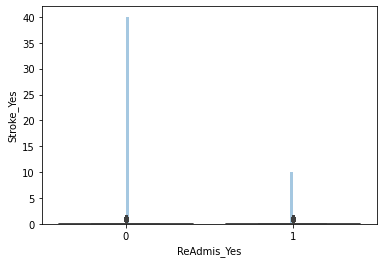

In [182]:
#-- Comparing target variable to stroke patients--#
stroke = med_clean.Stroke_Yes
plot6 = sns.distplot(stroke)

sns.boxplot(x="ReAdmis_Yes", y="Stroke_Yes", data= med_clean)

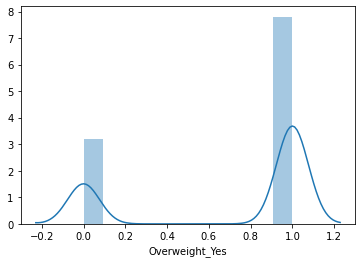

In [183]:
#--Distrobution of Overwieght patients--#
hvy = med_clean.Overweight_Yes
plot7 = sns.distplot(hvy)

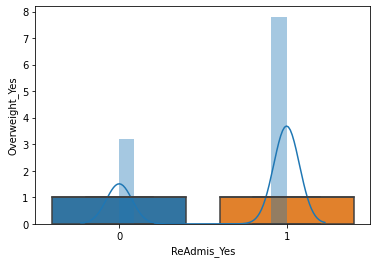

In [184]:
#--Comparing Overweight patients to the target variable--#
hvy = med_clean.Overweight_Yes
plot7 = sns.distplot(hvy)

sns.boxplot(x="ReAdmis_Yes", y="Overweight_Yes", data= med_clean)

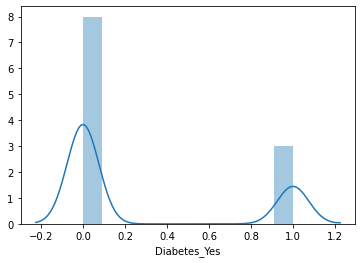

In [185]:
#-- Distrobution of patients with diabetes--#
dia = med_clean.Diabetes_Yes
plot8 = sns.distplot(dia)

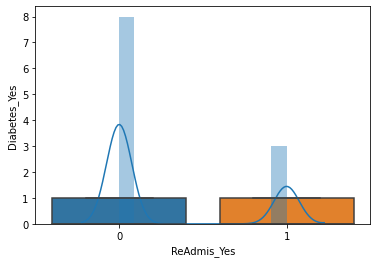

In [186]:
#--Comparing the diabetes patients to the target variable--#
dia = med_clean.Diabetes_Yes
plot8 = sns.distplot(dia)
sns.boxplot(x="ReAdmis_Yes", y="Diabetes_Yes", data= med_clean)

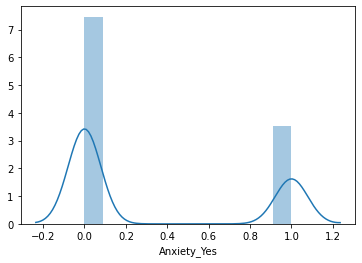

In [187]:
#-- Distrobution of patients with anxiety--#
anx = med_clean.Anxiety_Yes
plot9 = sns.distplot(anx)

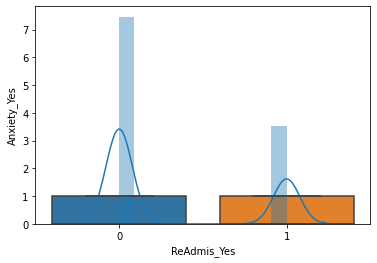

In [188]:
#--Comparing patients with anxiety to the target variable--#
anx = med_clean.Anxiety_Yes
plot9 = sns.distplot(anx)
sns.boxplot(x="ReAdmis_Yes", y="Anxiety_Yes", data= med_clean)

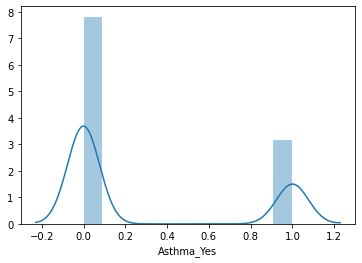

In [189]:
#-- Distrobution of patients with Asthma--#

asm = med_clean.Asthma_Yes
plot10 = sns.distplot(asm)


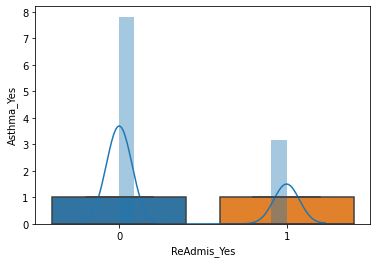

In [190]:
asm = med_clean.Asthma_Yes
plot10 = sns.distplot(asm)
sns.boxplot(x="ReAdmis_Yes", y="Asthma_Yes", data= med_clean)

# Creating the first Logistic Regression model

In [191]:

# Split the data into X & y

X = med_clean.drop('ReAdmis_Yes', axis = 1).values
y = med_clean['ReAdmis_Yes']

y = y.astype(int)

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)
#-- Initialize the logistic regression model --#
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

#-- Make predictions --#
y_pred = log_reg.predict(X_test) # Predictions
y_true = y_test # True values


y_test

7878    0
3224    0
1919    0
4432    0
4835    0
       ..
9073    1
8584    0
5390    1
5092    1
2964    0
Name: ReAdmis_Yes, Length: 2000, dtype: int64

Measure the accuracy

Train accuracy: 0.63
Test accuracy: 0.63

 First model 
Test confusion_matrix
First Model
The True Positive Rate is: [1. 0.]
The Precision is: [0.634   nan]
The False positive rate is: [1. 0.]
The False Negative Rate is:  [0. 1.]

The average TPR is: 0.5
The average Precision is: nan
The average False positive rate is: 0.5
The average False Negative Rate is: 0.5
The Log Loss on Training is:  0.6581906281930328
The Log Loss on Testing Dataset is:  0.6591080045553571


<ipython-input-192-38e65773b76f>:29: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)


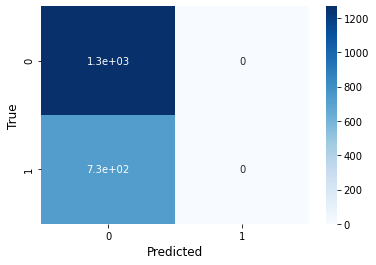

In [192]:

#-- Measure accuracy --#
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 log_reg.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n First model \nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#-- Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

print('First Model')
#-- Sensitivity, hit rate, recall, or true positive rate --#
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

#-- Precision or positive predictive value --#
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

#-- False positive rate or False alarm rate --#
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


#-- False negative rate or Miss Rate --#
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

#-- Total averages --#
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)
#-- Probability estimates --#
pred_proba = log_reg.predict_proba(X_train)

#-- Running Log loss on training --#
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

#-- Running Log loss on testing --#
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

Get information for the equation of the model

# Conducting PCA 
from reneshbedre.com

In the PCA analysis we can see, the first 4 PCs have eigenvalues over one. Therefore PCs 1-3 will be used in the final model. The The 3 variables to predict readmission for will be Population, Married, and childern


In [193]:
#--Inspecting eigenvalues on the clean data set --#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
med_clean =  StandardScaler().fit_transform(med_clean)  
pd.DataFrame(med_clean).head(10)

#--Proportion of Variance (from PC1 to PC9)--# 
pca_out = PCA().fit(med_clean)

print('The Eigenvalue of Population is:',pca_out.explained_variance_[0] )
print('The Eigenvalue of Children is:',pca_out.explained_variance_[1] )
print('The Eigenvalue of Marital_Married is:',pca_out.explained_variance_[2] )
print('The Eigenvalue of ReAdmis_Yes is:',pca_out.explained_variance_[3] )
print('The Eigenvalue of HighBlood_Yes is:',pca_out.explained_variance_[4] )
print('The Eigenvalue of Stroke_Yes is:',pca_out.explained_variance_[5] )
print('The Eigenvalue of Overweight_Yes is:',pca_out.explained_variance_[6] )
print('The Eigenvalue of Diabetes_Yes is:',pca_out.explained_variance_[7] )
print('The Eigenvalue of Anxiety_Yes is:',pca_out.explained_variance_[8] )
print('The Eigenvalue of Asthma_Yes is:',pca_out.explained_variance_[9] )

The Eigenvalue of Population is: 1.0487381305502108
The Eigenvalue of Children is: 1.0455933827027932
The Eigenvalue of Marital_Married is: 1.0348744395669667
The Eigenvalue of ReAdmis_Yes is: 1.0215595547498657
The Eigenvalue of HighBlood_Yes is: 0.9993363910225399
The Eigenvalue of Stroke_Yes is: 0.9874214194925989
The Eigenvalue of Overweight_Yes is: 0.981502142976813
The Eigenvalue of Diabetes_Yes is: 0.9705898945631132
The Eigenvalue of Anxiety_Yes is: 0.9588803373196023
The Eigenvalue of Asthma_Yes is: 0.9525044070654973


In [131]:
#-- Conducting feature scaling on the 'X' and 'y' dataframes --#

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#-- Applying PCA with three Principal components--#
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


# Build the final logistic regression model based on the transformed data

Train accuracy: 0.63
Test accuracy: 0.63

Final Model 
Test confusion_matrix
Final Model
The True Positive Rate is: [1. 0.]
The Precision is: [0.634   nan]
The False positive rate is: [1. 0.]
The False Negative Rate is:  [0. 1.]

The average TPR is: 0.5
The average Precision is: nan
The average False positive rate is: 0.5
The average False Negative Rate is: 0.5
The Log Loss on Training is:  0.6573123575506833
The Log Loss on Testing Dataset is:  0.6591080045553571

The intercept and coefficents the logistic regression model are:  [-0.54479333]  =  [[-0.0103825   0.00330796 -0.02614865]]


<ipython-input-194-c70204656586>:45: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)


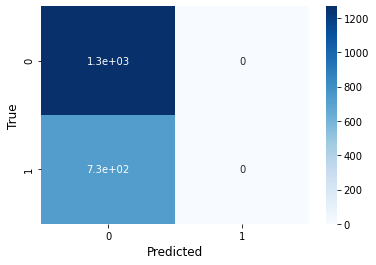

In [194]:
#-- Spliting into training and testing --#
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=2)

#-- Initialize the logistic regression model --#
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs')

#-- Train the model --#
log_reg2.fit(X_train_pca, y_train)

#-- Make predictions --#
y_pred = log_reg2.predict(X_test_pca) # Predictions
y_true = y_test # True values

#-- Measure accuracy --#
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 log_reg2.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

#-- Make the confusion matrix --#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print("\nFinal Model \nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

#--Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print("Final Model")
#-- Sensitivity, hit rate, recall, or true positive rate --#
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

#-- Precision or positive predictive value --#
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

#-- False positive rate or False alarm rate --#
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


#-- False negative rate or Miss Rate --#
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

#-- Total averages --#
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)
#-- Prediction for every instance in the cleaned dataset--#
pred_proba2 = log_reg2.predict_proba(X_train_pca)

#-- Running Log loss on training --#
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba2))

#-- Running Log loss on testing --#
pred_proba_t2 = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t2))
print("")
print ('The intercept and coefficents the logistic regression model are: ',log_reg2.intercept_, ' = ', log_reg2.coef_ )

Final model predictions

In [195]:

#--Predict hospital readmission if a person from a high population of 100,000 people, whom is not married with no children--#
guess1 = [[100000,0,0]]

pred_1 = log_reg2.predict_proba(guess1)

pred_1

#--Predicted re-admission--#

array([[1., 0.]])